## Теоретическое описание метода неопределенных коэффициентов и его программная реализация

Пусть в одномерной области $[x_{min}, x_{max}]$ задана равномерная сетка из $N = m + l + 1$ узлов (Равномерная сетка - сетка, расстояние между двумя любыми соседними узлами которой равно постоянному h, где h - сеточный шаг). На этой области определена бесконечно непрерывно дифференцируемая ф-я $f$. Известны значения этой ф-и во всех узлах рассматриваемой сетки $\{f_i\}_{i=0}^N$ (говорять, что определена сеточная ф-я - проекция ф-и на сетку). Пусть нас интересует значение производной в некотором узле $j$, слева от которого $l$ узлов, справа $m$. Построим метод максимального порядка точности по значениям функции в сеточных узлах. Для этого представим производную в узле $j$ как сумму значений ф-и во всех узлах, взятых с некоторыми весами:
$$
f'(x_j) \approx \frac{1}{h}\sum_{k = -l}^m \alpha_k f(x_j+kh)
$$
Подберем веса так, чтобы по этим значениям порядок точности был максимальным. Оказывается, что по $N$ точкам можно построить метод $N-1$-го порядка точности.

#### Контрольный вопрос: что такое порядок точности метода?

Ваш ответ: При определении ошибки у нас получается зависмость от $\Delta x$, в нашем случае от $h$. И т.к. мы раскладываем в ряд Тейлора, то под порядком точности метода считаем степень при $h$ старшего члена ошибки

Для этого разложим в ряд Тейлора все члены, входящие в суммирование в выбранной аппроксимации (численном приближении), относительно точки $x_j$, сгруппируем члены при одинаковых степенях и приравняем к нулю коэффициенты при степенях ниже N (кроме первой, для нее приравняем к 1). В итоге получим N уравнений относительно N неизвестных.

#### Контрольный вопрос: почему в этом случае порядок метода будет $N-1$?

Ваш ответ: потому что мы нашли коэффициенты, которые обнуляют все члены степени ниже $N$ (кроме первой), а при этом степень при $N$ не обязана обнулится. И тогда подставляем:
$$
\Delta f_{method} =  \frac{1}{h}\sum_{k = -l}^m |\alpha_k f^{(N)}(\xi_k)|h^N = \sum_{k = -l}^m |\alpha_k f^{(N)}(\xi_k)|h^{N-1} = Ch^{N-1}
$$
и получаем, что старшая степень равна $N-1$

В матричном виде получившуюся систему можно представить как $A\alpha = b$, где $b^T$ = $(0,1,0,...,0)^T$, а матрица A
$$
A = \begin{pmatrix} 
1 & 1 & ... & 1 \\
-l & -l+1 & ... & m \\
(-l)^2 & (-l+1)^2 & ... & m^2 \\
(-l)^3 & (-l+1)^3 & ...  & m^3 \\
...&...&...&...\\
\end{pmatrix}
$$

#### Контрольный вопрос: как называется такая матрица? Существует ли единственное решение системы и почему?

Ваш ответ: это матрица Вандермонда (или ее транспонированный вид, тот, что мы проходили на линейной алгебре, представлю ниже)
$$
V = \begin{pmatrix} 
1 & x_1 & x_1^2 & ... & x_1^{n-1} \\
1 & x_2 & x_2^2 & ... & x_2^{n-1} \\
...&...&...&... &...\\
1 & x_n & x_n^2 & ... & x_n^{n-1} \\
\end{pmatrix}
$$
Ее определитель тоже известен нам из курса линейной алгебры и равен
$$
det(V) = \prod\limits_{i\leq i\leq j\leq n} (x_i - x_j)
$$
Он не равен нулю, если $x_i$ и $x_j$ различны, что работает в нашем случае. А т.к. детерминант транспонированной матрицы равен детерминанту исходной, то можно утверждать о единственности решения данной системы

In [71]:
#скрипт, который реализует описанный выше алгоритм
import numpy as np
import numpy.linalg as la
import math

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    #print(A)
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff

p = 4 # порядок метода
a = np.pi/3
b = np.pi/2
h = (b-a)/p
print('h = ', h)
x = np.linspace(a, b, p+1)
u = np.sin(x) #ищем производную синуса

diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.13089969389957473
diff =  0.4999823898925212


## Часть 1. Ошибка и обусловленность МНК

Задание:

1. написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов
2. написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности

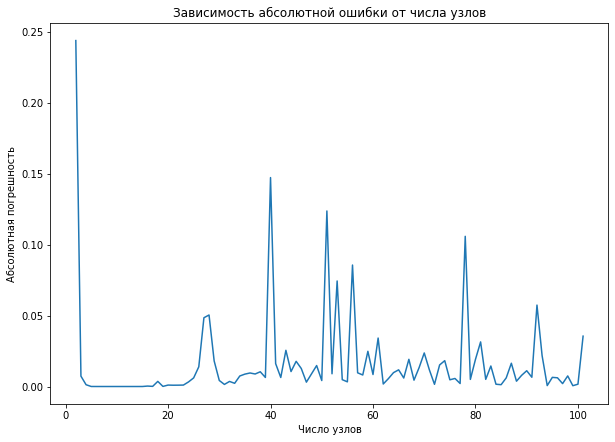

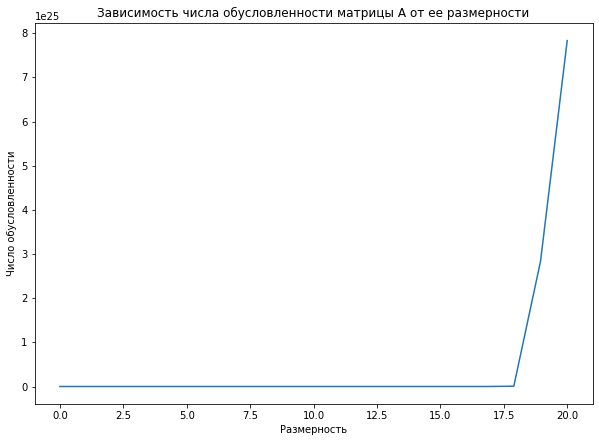

In [72]:
import matplotlib.pyplot as plt

x_1 = np.linspace(2, 101, num=100)
y_1 = [0]*100
for i in range(1, 101):
    x = np.linspace(a, b,  i+1)
    u = np.sin(x)
    y_1[i-1] = abs(np.cos(a) - get_diff(u, 0, i, (b-a)/i))
fig, pl = plt.subplots()
plt.plot(x_1, y_1)
plt.xlabel("Число узлов")
plt.ylabel("Абсолютная погрешность")
plt.title("Зависимость абсолютной ошибки от числа узлов")
fig.set_size_inches(10, 7)

x_2 = np.linspace(0, 20, num=20)
y_2 = [0]*20
for i in range(0, 20):
    x = np.linspace(a, b, i+1)
    u = np.sin(x)
    v = np.linspace(0,  i, u.size)
    A = np.fliplr(np.vander(v, v.size)).T
    y_2[i] = la.cond(A)
fig, pl = plt.subplots()
plt.plot(x_2, y_2)
plt.xlabel("Размерность")
plt.ylabel("Число обусловленности")
plt.title("Зависимость числа обусловленности матрицы A от ее размерности")
fig.set_size_inches(10, 7)

## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков.

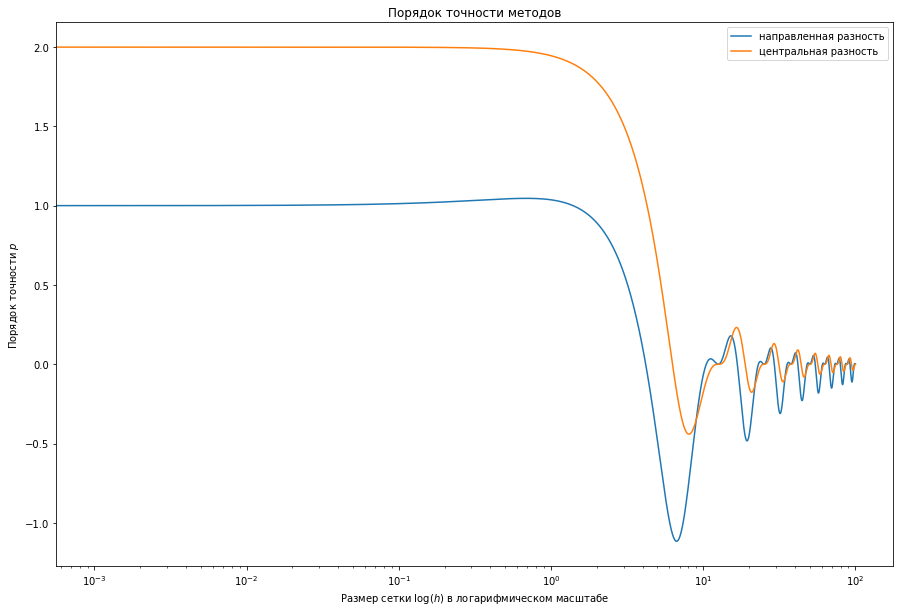

In [129]:
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 100000)
y_d = list()
y_c = list()
for i in range(1, 100001):
    h = i*0.001
    y_d.append(np.log2(abs((np.cos(a) - (np.sin(a+h) - np.sin(a))/h)/(np.cos(a) - (np.sin(a+h/2) - np.sin(a))/(h/2)))))
    y_c.append(np.log2(abs((np.cos(a) - (np.sin(a+h) - np.sin(a-h))/(2*h))/(np.cos(a) - (np.sin(a+h/2) - np.sin(a-h/2))/h))))
fig, pl = plt.subplots()
plt.plot(x, y_d, label='направленная разность')
plt.plot(x, y_c, label='центральная разность')
plt.xlabel("Размер сетки $\log(h)$ в логарифмическом масштабе")
plt.ylabel("Порядок точности $p$")
plt.xscale('log')
plt.title("Порядок точности методов")
fig.set_size_inches(15, 10)
plt.legend()

На промежутке $\log(h) \lesssim 10^{-1} $ можно считать, что $C \simeq C_1$ и можно на этом промежутке определять $p$. Получаем, что порядок точности при определении производной методом направленной разности $p_d = 1$, а методом центральной разности $p_c = 2$. В этом можно убедиться, если расписать погрешность (при этом в первом случае достаточно расписать до второго порядка, а при центральной разности придеться расписывать до 3 порядка, т.к. ниже все сокращается):
$$
\varepsilon_{1method} = \left| f'(x) - \dfrac{f(x+h)-f(x)}{h}\right| = \left|f'(x)-\dfrac{f(x)+f'(x)h+f''(\xi)\frac{h^2}{2}-f(x)}{h}\right| \leq \max\limits_{\xi}|f''(\xi)|\dfrac{h}{2} = O(h)
$$
\
\
$$
\varepsilon_{2method} = \left| f'(x) - \dfrac{f(x+h)-f(x-h)}{2h}\right| = \\
\left|f'(x)-\dfrac{f(x)+f'(x)h+f''(x)h^2 + f'''(\xi)\dfrac{h^3}{6}-f(x)-f'(x)(-h)-f''(x)h^2 - f'''(\xi)\dfrac{(-h)^3}{6}}{h}\right| \leq \max\limits_{\xi}|f'''(\xi)|\dfrac{h^3}{6} = O(h^2)
$$

## Использование sympy для дифференцирования ф-й

Пакет sympy очень удобный инструмент для символьных вычислений. Но не стоит с помощью него реализовывать какие-либо численные методы. Рассмотрим пример его использования для дифференцирования:

In [12]:
#пример взять отсюда https://maths-with-python.readthedocs.io/en/latest/07-sympy.html
#еще про sympy можно посмотреть здесь http://www.asmeurer.com/sympy_doc/dev-py3k/tutorial/tutorial.ru.html
import sympy as sp
import numpy as np

x = sp.Symbol('x')

expression = x**2*sp.sin(sp.log(x))
print('Первая производная', sp.diff(expression, x))
print('Вторая производная', sp.diff(expression, x, 2))
print('Третья производная', sp.diff(expression, x, 3))

expr2 = sp.sin(x)
expr2 = sp.diff(expr2, x, 2)
expr2.subs(x, np.pi/2) #подстваляем значение и вычисляем символьное выражение

Первая производная 2*x*sin(log(x)) + x*cos(log(x))
Вторая производная sin(log(x)) + 3*cos(log(x))
Третья производная (-3*sin(log(x)) + cos(log(x)))/x


-1.00000000000000